# Homework 3: Questions 1 & 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
# Functions for plotting, do not need to change

def set_spines_invisible(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def set_grid_invisible(ax):
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

def common_label(fig, xlabel, ylabel):
    """Put a common `xlabel` and `ylabel` on the figure `fig`.
    
    Args:
        - fig (plt.figure)
        - xlabel (str)
        - ylabel (str)
    """
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## Question 1

In [3]:
# Load data
X_real = np.load("data/hw3-q1_train.npy")
num_trials = 91
num_class = 8
num_neurons = 97

In [4]:
X_real.shape

(728, 97)

In [5]:
X_real.shape

(728, 97)

### Q1(a)

Plot the square-root of the eigenvalues of the data covariance matrix, sorted in decreasing order. The values indicate the standard deviation of the high-dimensional data along each of the principal component directions.

Optional: Note that the square root eigenvalues are the singular values of a simple transformation of the data matrix. If you like, you may use SVD instead of eigenvalue decomposition for this question, but make sure you are taking the SVD of the correct matrix! Hint: write out the sample covariance as a function of the original data matrix.

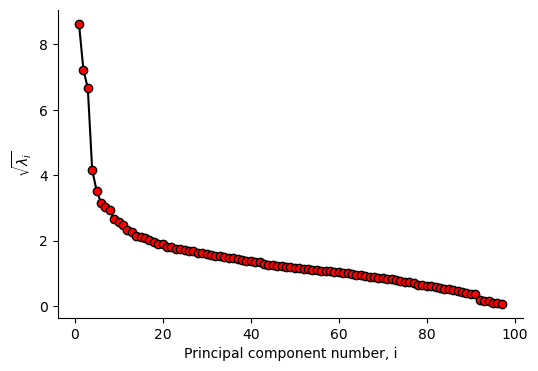

In [6]:
mean_vec = np.mean(X_real, axis=0)
centered_data = X_real - mean_vec

cov_matrix = np.cov(centered_data.T)

real_evals, real_evecs = np.linalg.eig(cov_matrix)

sqrt_eval = np.sqrt(real_evals)

sorted_indices = np.argsort(sqrt_eval)[::-1]
sorted_eigenvecs = real_evecs[:, sorted_indices]
sqrt_eigvals = sqrt_eval[sorted_indices]

PC_numbers = np.arange(1,num_neurons+1)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(PC_numbers, sqrt_eigvals, c="k", marker="o", mfc="r", mec="k")
ax.set_ylabel(r"$\sqrt{\lambda_i}$")  
ax.set_xlabel("Principal component number, i")
set_spines_invisible(ax)
plt.show()

In [11]:
r = 3 # number of dominant singular values

D_sum = np.sum(real_evals[0:r])

T_sum = np.sum(real_evals)

explained_var = D_sum/T_sum # explained variance of top r singular values

print(f"There appears to be an elbow after the {r}th dominant singular value. The top {r} singular values explain {explained_var*100:.2f}% of the data variance.")

There appears to be an elbow after the 3th dominant singular value. The top 3 singular values explain 44.84% of the data variance.


### Q1(b)

(91, 97) (97, 3)
(91, 97) (97, 3)
(91, 97) (97, 3)
(91, 97) (97, 3)
(91, 97) (97, 3)
(91, 97) (97, 3)
(91, 97) (97, 3)
(91, 97) (97, 3)


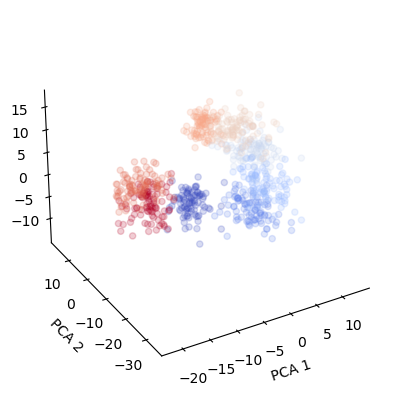

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = plt.cm.coolwarm(np.linspace(0, 1, num_class))
angle_idxs = np.arange(0, (728 + 91), 91)

for i in np.arange((len(angle_idxs)) - 1):
    start_idx = angle_idxs[i]
    end_idx = angle_idxs[i + 1]
    dot_data = centered_data[start_idx:end_idx]
    eig_vec = sorted_eigenvecs[:, :3]

    print(dot_data.shape, eig_vec.shape)
    data_3d = np.dot(dot_data, eig_vec)

    ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], alpha=0.2, c = [colors[i]], label=f'Reach Angle {i + 1}')

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
set_grid_invisible(ax)

ax.view_init(elev=30, azim=240)  

plt.show()

### Q1(c)

Text(0, 0.5, 'principal component #')

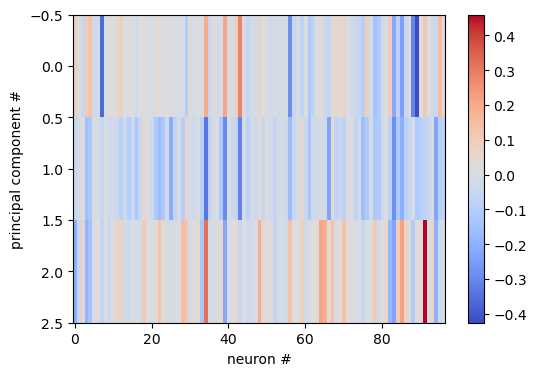

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

U_M = sorted_eigenvecs[:, :3]
plt.imshow(np.transpose(eig_vec), cmap = 'coolwarm', aspect = 'auto')
plt.colorbar()

ax.set_xlabel("neuron #")
ax.set_ylabel("principal component #")

In [53]:
ans = 'No, there is no obvious grouping'
print(f"Are there groupings? \nA: {ans}")

Are there groupings? 
A: No, there is no obvious grouping


## Question 2

In [12]:
# Load data
X_sim = np.load("data/hw3-q2_sim.npy")
N, p = X_sim.shape

In [14]:
X_sim.shape

(8, 2)

### Q2(a)

In [38]:
mu_s = np.mean(X_sim, axis = 0)
de_mean_s = X_sim - mu_s

cov_s = np.cov(de_mean_s.T)

eval_s, evec_s = np.linalg.eig(cov_s)
sorted_idx_s = np.argsort(eval_s)[::-1]
sorted_vec_s = evec_s[:, sorted_idx_s]

u1 = sorted_vec_s[:, 0]
dim_grid_points = np.arange(-10, 13.5, 0.5)

dim_1 = np.dot(de_mean_s, u1)

In [39]:
dim_line = np.zeros((len(dim_grid_points), 2))
for idx, val in enumerate(dim_grid_points):
    dim_line[idx] = (val * u1) + mu_s 

In [40]:
projected_points = np.zeros((8, 2)) 

for idx, val in enumerate(dim_1): 
    projected_points[idx] = (val * u1)  + mu_s

x1, y1 = zip(*X_sim)
x2, y2 = zip(*projected_points)

In [34]:
u1.shape

(2,)

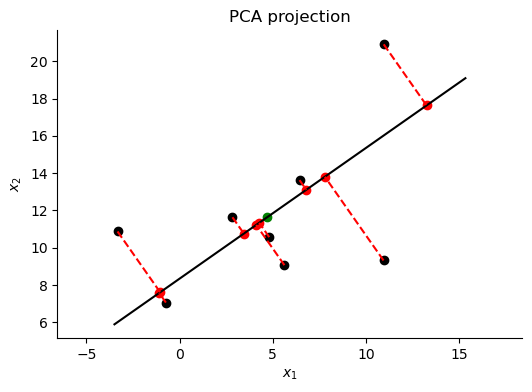

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.scatter(X_sim[:, 0], X_sim[:, 1], color = 'k')
plt.scatter(mu_s[0], mu_s[1], color = 'g')
plt.plot(dim_line[:,0], dim_line[:, 1], linestyle="-", color = 'k')
plt.scatter(projected_points[:,0], projected_points[:, 1], color = 'r')

for i in np.arange(8):
    plt.plot([x1[i], x2[i]], [y1[i], y2[i]], 'r--')

ax.set_title("PCA projection")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
plt.axis('equal')
set_spines_invisible(ax)
plt.show()

### Q2(b)

Notations used in the code below:
$\begin{equation}
X = \mu + WZ + \epsilon,\ \ \epsilon \sim \mathcal{N}(0, \Psi)
\end{equation}$
where the variable for $\mu$ is named ``mu``, $\Psi$ is denoted as ``Psi``, etc.

In [58]:
# ----- YOUR CODE HERE ----- #
def em_algorithm(X: np.array, zDim: int, typ: str = "PPCA", tol: float = 1e-8, cyc: int = int(80), minVarFrac: float = 0.01, verbose: bool = True):
    """
    Performs EM algorithm for FA or PPCA.

    Args:
        X: data matrix, shape = (xDim, num_trials)
        zDim: dimension of latent factors
        typ: type of analysis, "FA" or "PPCA"
        tol: stopping criterion for EM algorithm
        cyc: maximum number of EM iterations
        minVarFrac: fraction of overall data variance for each observed dimension
            to set as the private variance floor.  This is used to combat 
            Heywood cases, where ML parameter learning returns one or more 
            zero private variances.
            (See Martin & McDonald, Psychometrika, Dec 1975.)
        verbose: whether to display status message
    Returns:
        estParams (dict): estimated parameters, keys: "W", "Psi", "mu"
            W: Loadings matrix, shape = (xDim, zDim)
            Psi: Diagonal of the observation noise covariance, shape = (xDim)
                Note: For PPCA, all elements of Psi should be the same (\sigma^2).
                      For FA, each element may be different (Psi[i] = \sigma^2_i).
            mu: The empirical data mean, shape = (xDim)
        LL (array-like): log-likelihood values for each EM iteration.
    """
    
    # Set random seed for reproducibility
    np.random.seed(0)
    
    # Initialization of parameters
    xDim, N = X.shape
    cX = np.cov(X, ddof=0)
    scale = np.mean(np.diag(cX))
    W = np.random.randn(xDim, zDim) * np.sqrt(scale/zDim)
    Psi = np.diag(cX)
    mu = np.mean(X, axis=1)
    varFloor = minVarFrac * np.diag(cX)

    I = np.identity(zDim)
    
    # Set up log-likelihood
    LLi = 0
    LL = []

    # EM iterations loop
    for i in range(1, cyc+1):
        
        # Compute data log likelihood
        LLold = LLi

        C = W @ np.transpose(W) + np.diag(Psi)
        LLi = multivariate_normal(mean = mu, cov = C).logpdf(X.T).sum()

        if verbose:
            print(f"Iteration {i}: LL {LLi}")
        LL.append(LLi)
        
        # E-step

        E = np.zeros((N))
        C = W @ np.transpose(W) + np.diag(Psi) 

        for idx, point in enumerate(X.T):  
            E[idx] = W.T @ np.linalg.inv(C) @ (point - mu)

        cov_z_x = I - W.T @ np.linalg.inv(C) @ W

        E_z_x = 0 

        for val in E: 
            E_z_x += cov_z_x + (val * np.transpose(val))

        # M-step
        
        X_centered = X.T - mu
        W_new_num = 0

        for idx, point in enumerate(X_centered):
            W_new_num += ((point) * np.transpose(E[idx]))

        W = (W_new_num.reshape(-1, 1)) @ np.linalg.inv(E_z_x)

        left = 0
        right = 0

        for idx, point in enumerate(X_centered):
            point = point.reshape(-1, 1)
            left += point @ point.T
            right += W @ ((E[idx] * point.T))

        if typ == "PPCA":
            Psi = np.trace(left - right) * 1/(N*xDim)
            ss = np.maximum(varFloor, np.mean(Psi))
            Psi = ss * np.ones(xDim)

        elif typ == "FA":
            Psi = np.diag(left - right) * 1/N
            Psi = np.maximum(varFloor, Psi)
        else:
            raise ValueError(f"``typ`` {typ} is not supported.")

        # Termination criterion
        if i <= 2: # Guarantees that we do at least two EM iterations
            LLbase = LLi
        elif LLi < LLold: # Determine whether there are ever likelihood violations
            print('VIOLATION')
        elif (LLi - LLbase) < (1 + tol) * (LLold - LLbase): # Terminate EM
            break

    if np.any(Psi == varFloor):
        print('Warning: Private variance floor used for one or more observed dimensions in FA.')
    
    estParams = {'W': W, 'Psi': Psi, 'mu': mu}
    return estParams, LL

Iteration 1: LL -47.79385624344881
Iteration 2: LL -45.331545267225636
Iteration 3: LL -45.002456081747994
Iteration 4: LL -44.96147922042135
Iteration 5: LL -44.95638676056152
Iteration 6: LL -44.95575003049615
Iteration 7: LL -44.955669592130846
Iteration 8: LL -44.9556592260373
Iteration 9: LL -44.95565781726398
Iteration 10: LL -44.955657595710775
Iteration 11: LL -44.95565754853415
Iteration 12: LL -44.95565753406664
Iteration 13: LL -44.955657528453884
Iteration 14: LL -44.95565752605869


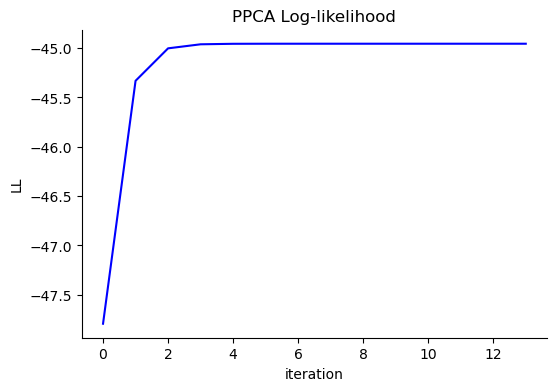

In [59]:
ppca_est, ppca_ll = em_algorithm(X_sim.T, 1, "PPCA")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ppca_ll, "b")
ax.set_xlabel("iteration")
ax.set_ylabel("LL")
ax.set_title("PPCA Log-likelihood")
set_spines_invisible(ax)
plt.show()

### Q2(c)

In [60]:
# The sample constrained covariance estimated by PPCA (i.e., the modeled cov[x])
W_PPCA = ppca_est['W']
Psi_PPCA = ppca_est['Psi']
Mu_PPCA = ppca_est['mu']

identity_matrix = np.identity(2)
identity_matrix[np.diag_indices(2)] = Psi_PPCA.flatten()

C_PPCA = (W_PPCA @ W_PPCA.T) + (identity_matrix)

# The empirical data covariance
S = np.cov(X_sim.T, ddof=0)


print("The observation noise variances estimated by PPCA are: ")
print(Psi_PPCA)
print("\nThe sample covariance estimated by PPCA is: ")
print(C_PPCA)
print("\nThis should be very close to the empirical data covariance: ")
print(S)

The observation noise variances estimated by PPCA are: 
[8.97184599 8.97184599]

The sample covariance estimated by PPCA is: 
[[22.43114207  9.43952992]
 [ 9.43952992 15.59215693]]

This should be very close to the empirical data covariance: 
[[22.43138488  9.43979111]
 [ 9.43979111 15.59221145]]


### Q2(d)

In [61]:
de_mean_PPCA = X_sim - Mu_PPCA
eval_PPCA, evec_PPCA = np.linalg.eig(C_PPCA)

sorted_idx_PPCA = np.argsort(eval_PPCA)[::-1]
sorted_vec_PPCA = evec_PPCA[:, sorted_idx_PPCA]

u1_PPCA = sorted_vec_PPCA[:, 0]
dim_grid_points = np.arange(-10, 13.5, 0.5)

dim_1_PPCA = np.dot(de_mean_PPCA, u1_PPCA)
projected_points_PPCA = np.zeros((8, 2))
dim_line_PPCA = np.zeros((len(dim_grid_points), 2))

for idx, val in enumerate(dim_grid_points):
    dim_line_PPCA[idx] = (val * u1_PPCA) + Mu_PPCA

for idx, val in enumerate(dim_1_PPCA):
    projected_points_PPCA[idx] = (val * u1_PPCA) + Mu_PPCA
x1, y1 = zip(*X_sim)
x2_PPCA, y2_PPCA = zip(*projected_points_PPCA)

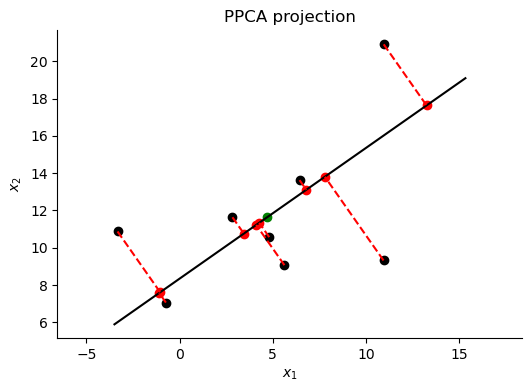

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plt.scatter(X_sim[:, 0], X_sim[:, 1], color = 'k')
plt.scatter(mu_s[0], mu_s[1], color = 'g')
plt.plot(dim_line_PPCA[:,0], dim_line_PPCA[:, 1], linestyle="-", color = 'k')
plt.scatter(projected_points_PPCA[:,0], projected_points_PPCA[:, 1], color = 'r')

for i in np.arange(8):
    plt.plot([x1[i], x2_PPCA[i]], [y1[i], y2_PPCA[i]], 'r--')
plt.axis('equal')

ax.set_title("PPCA projection")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
set_spines_invisible(ax)
plt.show()

In [77]:
ans = 'The red lines are no longer orthogoal to the PC space, because the projected points are defined by our calculated covariance and mean, \n   rather than the sampled covariance and mean from the data'
print(f"Question: Why are the red lines no longer orthogonal to the PC space? \nA: {ans}")

Question: Why are the red lines no longer orthogonal to the PC space? 
A: The red lines are no longer orthogoal to the PC space, because the projected points are defined by our calculated covariance and mean, 
   rather than the sampled covariance and mean from the data


### Q2(e)

Iteration 1: LL -47.79385624344881
Iteration 2: LL -45.33164008371824
Iteration 3: LL -45.00262499081519
Iteration 4: LL -44.96161014153298
Iteration 5: LL -44.95642010412601
Iteration 6: LL -44.95575670721437
Iteration 7: LL -44.95567093804834
Iteration 8: LL -44.95565953975972
Iteration 9: LL -44.95565790455023
Iteration 10: LL -44.955657622883805
Iteration 11: LL -44.955657557238986
Iteration 12: LL -44.95565753674536
Iteration 13: LL -44.955657529182744
Iteration 14: LL -44.95565752619695


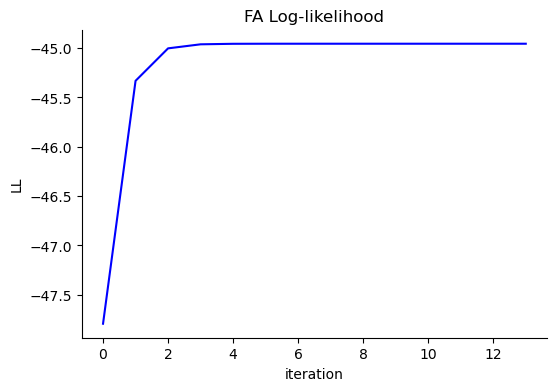

In [68]:
fa_est, fa_ll = em_algorithm(X_sim.T, 1, "FA")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(fa_ll, "b")
ax.set_xlabel("iteration")
ax.set_ylabel("LL")
ax.set_title("FA Log-likelihood")
set_spines_invisible(ax)
plt.show()

### Q2(f)

In [69]:
# The sample constrained covariance estimated by FA (i.e., the modeled cov[x])
W_FA = fa_est['W']
Psi_FA = fa_est['Psi']
Mu_FA = fa_est['mu']

identity_matrix = np.identity(2)
identity_matrix[np.diag_indices(2)] = Psi_FA.flatten()
C_FA = (W_FA @ W_FA.T) + (identity_matrix)

# The empirical data covariance
S = np.cov(X_sim.T, ddof=0)


print("The observation noise variances estimated by FA are: ")
print(Psi_FA)
print("\nThe sample covariance estimated by FA is: ")
print(C_FA)
print("\nThis should be very close to the empirical data covariance: ")
print(S)

The observation noise variances estimated by FA are: 
[8.80081974 9.05489625]

The sample covariance estimated by FA is: 
[[22.43116551  9.43951441]
 [ 9.43951441 15.59210623]]

This should be very close to the empirical data covariance: 
[[22.43138488  9.43979111]
 [ 9.43979111 15.59221145]]


### Q2(g)

In [70]:
de_mean_FA = X_sim - Mu_FA
eval_FA, evec_FA = np.linalg.eig(C_FA)

sorted_idx_FA = np.argsort(eval_FA)[::-1]
sorted_vec_FA = evec_FA[:, sorted_idx_FA]

u1_FA = sorted_vec_FA[:, 0]
dim_grid_points = np.arange(-10, 13.5, 0.5)

dim_1_FA = np.dot(de_mean_FA, u1_FA)
projected_points_FA = np.zeros((8, 2))
dim_line_FA = np.zeros((len(dim_grid_points), 2))

for idx, val in enumerate(dim_grid_points):
    dim_line_FA[idx] = (val * u1_FA) + Mu_FA

for idx, val in enumerate(dim_1_PPCA):
    projected_points_FA[idx] = (val * u1_FA) + Mu_FA
x1, y1 = zip(*X_sim)
x2_FA, y2_FA = zip(*projected_points_FA)

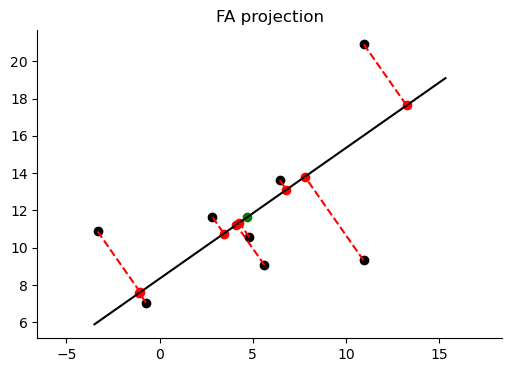

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plt.scatter(X_sim[:, 0], X_sim[:, 1], color = 'k')
plt.scatter(mu_s[0], mu_s[1], color = 'g')
plt.plot(dim_line_FA[:,0], dim_line_FA[:, 1], linestyle="-", color = 'k')
plt.scatter(projected_points_FA[:,0], projected_points_FA[:, 1], color = 'r')

for i in np.arange(8):
    plt.plot([x1[i], x2_FA[i]], [y1[i], y2_FA[i]], 'r--')
plt.axis('equal')

ax.set_title("FA projection")
set_spines_invisible(ax)
plt.show()

In [76]:
ans = 'FA explicitly models latent variables and aims to capture shared variance among observed variables, while PCA and \n PPCA focus on capturing variance in the data without explicitly considering underlying factors.'
print(f"Question: Why is the low- dimensional space found by FA different from that found by PCA and PPCA? \nA: {ans}")

Question: Why is the low- dimensional space found by FA different from that found by PCA and PPCA? 
A: FA explicitly models latent variables and aims to capture shared variance among observed variables, while PCA and 
 PPCA focus on capturing variance in the data without explicitly considering underlying factors.
